In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
glass = pd.read_csv('glass.csv', encoding = 'cp949')

In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.shape

(214, 10)

In [6]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [7]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
X = glass.drop(['Type'], axis = 1)
Y = glass['Type']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
#n_neighbors : 기본적인 인접 항목 수 보통 홀수로 사용(짝수일경우 인접 항목 수가 k/2: k/2로 분류가 안 될 수 있기 때문)
#algorithm : 가장 가까운 이웃을 찾는데 사용하는 알고리즘으로 'Kd_Tree', 'ball_Tree', 'brute'가 있다. default값은 'auto'이다.
## 'auto'는 데이터를 파악해서 가장 좋은 알고리즘을 자동으로 선택한다.
#metric : 사용될 거리지표를 선정하는 파라미터로 default값은 '민노우스키 거리'이다. 하지만 대부분 '유클리드 거리'를 사용한다.
knn

KNeighborsClassifier(n_neighbors=3)

### Nearest Neighbor Algorithms
#### Brute Force(브루트 포스) : 무차별적으로 데이터 집합의 모든 데이터 쌍의 거리를 계산한다. 소규모 데이터 셋에서는 좋을 수 있으나 데이터 셋이 클경우에는 시간이 오래걸린다.
#### K-D Tree : 비효율적인 brute-force 접근법을 해결하기 위해서, 트리 기반으로 이루어진 알고리즘으로 거리 집계 정보를 효율적으로 인코딩해서 필요한 거리 계산 수를 줄이려고 시도한다. 
#### Ball Tree : K-D Tree의 비효율성을 줄이기 위해 개발된 트리 구조로 매우 높은 차원이나 매우 구조화된 데이터에서 효율적으로 사용할 수 있다.

### <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric" >거리지표</a> 

#### (KNN에서 주로 사용하는 지표) <a href = "https://syj9700.tistory.com/8"> 참고 </a>
#### 유클리디안 거리 : 두 관측치사이의 직선거리로 가장 흔히 사용하는 거리이다.
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/2e0c9ce1b3455cb9e92c6bad6684dbda02f69c82"></img>
#### 맨하튼 거리 : 격자를 이용한 거리로 각 좌표축 방향으로만 이동할 경우에 계산되는 거리이다. 
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/4704625b5a645aae2cd0177cab7e8892b8f962bf"></img>
#### 마할라노비스 거리 : 변수내 분산, 변수간 공분산을 반영한 거리이다. 공분산 행렬이 단위행렬이면 유클리디안 거리가 된다.
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FWNbht%2FbtqEDTpgCyf%2FVQ4c8ZGpHL0Uct5CLEelC1%2Fimg.png"></img>
#### 노란색으로 칠해진 부분이 공분산행렬을 의미한다. 공분산 행렬의 역행렬은 변수간의 상관관계를 고려하겠다는 의미이다.

In [12]:
y_pred = knn.predict(X_test)

In [13]:
print(y_test)
print(y_pred)

165    5
46     1
99     2
65     1
210    7
      ..
155    3
85     2
132    2
1      1
91     2
Name: Type, Length: 65, dtype: int64
[5 2 1 1 7 2 1 1 7 2 1 1 5 1 2 7 2 2 2 2 7 1 2 6 7 2 2 2 1 1 2 2 1 7 2 1 1
 1 7 1 1 1 1 1 7 2 1 1 6 1 1 2 7 2 1 2 1 2 1 1 1 2 2 1 2]


In [14]:
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_pred)
knn_report = metrics.classification_report(y_test, y_pred)

print(knn_matrix)
print(knn_report)

[[15  4  0  0  0  0]
 [ 7 19  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 2  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.52      0.79      0.62        19
           2       0.83      0.73      0.78        26
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.82      0.90        11

    accuracy                           0.72        65
   macro avg       0.72      0.72      0.72        65
weighted avg       0.71      0.72      0.71        65



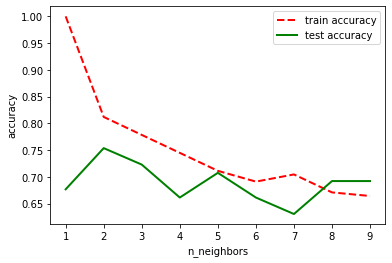

In [15]:
train_list = []

test_list = []

n_range = range(1, 10)



for i in n_range:

    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)

    knn.fit(X_train, y_train)

    tr_score = knn.score(X_train, y_train)
    te_score = knn.score(X_test, y_test)

    train_list.append(tr_score)
    test_list.append(te_score)
    
plt.plot(n_range, train_list, color='red', ls='--', lw=2, label='train accuracy') # ls = linestyle, lw= linewidth

plt.plot(n_range, test_list, color='green', lw=2, label='test accuracy')

plt.xticks(n_range)

plt.xlabel('n_neighbors')

plt.ylabel('accuracy')

plt.legend() 

plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean').fit(X_train, y_train)
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [17]:
y_pred = knn.predict(X_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_pred)
knn_report = metrics.classification_report(y_test, y_pred)

print(knn_matrix)
print(knn_report)

[[15  4  0  0  0  0]
 [ 7 19  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 2  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.52      0.79      0.62        19
           2       0.83      0.73      0.78        26
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.82      0.90        11

    accuracy                           0.72        65
   macro avg       0.72      0.72      0.72        65
weighted avg       0.71      0.72      0.71        65



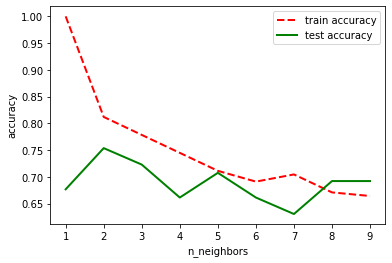

In [18]:
train_list = []

test_list = []

n_range = range(1, 10)



for i in n_range:

    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1, metric = 'euclidean')

    knn.fit(X_train, y_train)

    tr_score = knn.score(X_train, y_train)
    te_score = knn.score(X_test, y_test)

    train_list.append(tr_score)
    test_list.append(te_score)
    
plt.plot(n_range, train_list, color='red', ls='--', lw=2, label='train accuracy') # ls = linestyle, lw= linewidth

plt.plot(n_range, test_list, color='green', lw=2, label='test accuracy')

plt.xticks(n_range)

plt.xlabel('n_neighbors')

plt.ylabel('accuracy')

plt.legend() 

plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
knn = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan').fit(X_train, y_train)
knn

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [20]:
y_pred = knn.predict(X_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_pred)
knn_report = metrics.classification_report(y_test, y_pred)

print(knn_matrix)
print(knn_report)

[[16  3  0  0  0  0]
 [ 7 18  0  1  0  0]
 [ 5  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 1  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.55      0.84      0.67        19
           2       0.82      0.69      0.75        26
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.82      0.90        11

    accuracy                           0.72        65
   macro avg       0.67      0.73      0.69        65
weighted avg       0.71      0.72      0.70        65



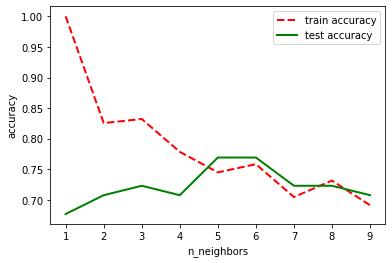

In [21]:
train_list = []

test_list = []

n_range = range(1, 10)



for i in n_range:

    knn = KNeighborsClassifier(n_neighbors=i, metric = 'manhattan')

    knn.fit(X_train, y_train)

    tr_score = knn.score(X_train, y_train)
    te_score = knn.score(X_test, y_test)

    train_list.append(tr_score)
    test_list.append(te_score)
    
plt.plot(n_range, train_list, color='red', ls='--', lw=2, label='train accuracy') # ls = linestyle, lw= linewidth

plt.plot(n_range, test_list, color='green', lw=2, label='test accuracy')

plt.xticks(n_range)

plt.xlabel('n_neighbors')

plt.ylabel('accuracy')

plt.legend() 

plt.show()

## Logistic Regression